## Códigos y visualizaciones para análisis de sentimientos
### Maria del Carmen Falcón Aybar
#### Maestría en Ciencia de Datos - Captura de la información

## Instaladores

In [ ]:
# Instalo y descargo nltk y descargp vader lexicon
!pip install nltk
import nltk
nltk.download('vader_lexicon')

# Instalo TextBlob y su modelo de idioma
!pip install textblob
!python -m textblob.download_corpora

from textblob import TextBlob

# Instalo bibliotecas para análisis de datos
!pin install pandas numpy os matplotlib seaborn


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
/bin/bash: line 1: pin: command not found


## Desarrollo de programa para ingresar por pantalla

### a. Natural language toolkit (NLTK)

Utilizo la biblioteca NLTK, ya que es de código abierto para el procesamiento de PNL. Esta herramienta analiza palabras y frases, identificando si el sentimiento es positivo, negativo o neutro, y trabajo con el módulo VADER de NLTK.

La principal limitación es subir textos en inglés, ya que los resultados ofrecen mayor precisión en ese idioma. Además, por ahora, aún no he descubierto cómo incrementar el número de palabras analizadas, por lo que hay un límite en la cantidad de palabras que pueden ser procesadas

Sobre los resultados, los valores que alcanzará son:
1. neg ==> de negativo
2. pos ==> de positivo
3. neu ==> de neutral
4. compound ==> es un score y brinda el porcentaje final de los sentimientos (-1 a 1)

Los scores de sentimiento usualmente se encuentran entre **-1 a 1**, siendo *-1* el valor máximo para sentimientos negativos y *1* El valor máximo para sentimientos positivos y *0* para sentimientos neutrales.



In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Inicializando el analizador VADER
sid = SentimentIntensityAnalyzer()

# Input
text = input("Please, enter a text for sentiment analysis: ")

# Obtengo el puntaje de sentimiento
sentiment = sid.polarity_scores(text)

# Resultados
print("\nSentiment analysis results:")
print(f"Text entered: {text}")
print(f"Polarity score: {sentiment}")

# Interpretación
if sentiment['compound'] >= 0.05:
    print("The sentiment is positive.")
elif sentiment['compound'] <= -0.05:
    print("The sentiment is negative.")
else:
    print("The sentiment is neutral.")


Please, enter a text for sentiment analysis: I love to hate you

Sentiment analysis results:
Text entered: I love to hate you
Polarity score: {'neg': 0.374, 'neu': 0.202, 'pos': 0.424, 'compound': 0.128}
The sentiment is positive.


### b. Trabajando con comentarios

Para realizar esta sección, trabajé con comentarios descargados en inglés de YouTube. Elegí el canal de CNN-News18 sobre la temática de las elecciones presidenciales en Estados Unidos porque incluye tanto comentarios positivos como negativos, lo que proporciona una muestra realista. A cada comentario se le asignó un puntaje entre -1 y 1.

Utilicé la biblioteca pandas y herramientas gráficas para analizar y visualizar los datos. La principal limitación fue la necesidad de editar los comentarios, excluyendo aquellos que contenían emoticonos o caracteres especiales no compatibles con el programa.

In [ ]:
import pandas as pd
import numpy as np
import os

sid = SentimentIntensityAnalyzer()

df = pd.read_csv('Comment_Kamala_Trump.csv')
#df.head()

df['sentiment'] = df['comment'].apply(lambda x: sid.polarity_scores(x)['compound'])# agrego la columna "sentiment" y solicito scores

df.to_csv('Comment_Kamala_Trump_sentiment.csv', index=False) # Guardo los datos en una nueva base para visualizar los resultados
df.head()


,comment,sentiment
0,MANIPULATE CHEAT,-0.4588
1,"212 MAX EV FOR KAMALA""",0.0000
2,A draft dodger entering Arlington cemetery is ...,-0.9036
3,A lie! Kamala Harris continues to expose herse...,0.9918
4,All lied,-0.3818


In [ ]:

# Llamo el archivo creado
df = pd.read_csv('Comment_Kamala_Trump_sentiment.csv')
sentiment_df = df[['sentiment']]

# Creao una nueva columna para categorizar los valores de sentimiento
def categorize_sentiment(value):
    if value >= 0.05:
        return 'Positive'
    elif value <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Aplico la función de categorización a la columna de sentimiento
sentiment_df['category'] = sentiment_df['sentiment'].apply(categorize_sentiment)
print(sentiment_df.head())


   sentiment  category
0    -0.4588  Negative
1     0.0000   Neutral
2    -0.9036  Negative
3     0.9918  Positive
4    -0.3818  Negative


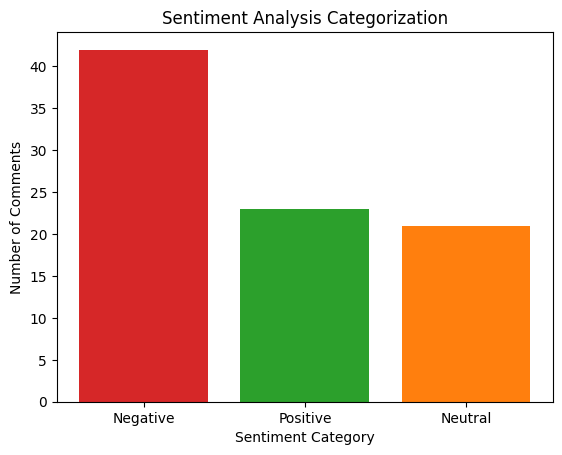

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# cuento los datos de category
category_counts = sentiment_df['category'].value_counts()

#https://python-charts.com/es/colores/
colors = ['#2ca02c' if x == 'Positive' else '#d62728' if x == 'Negative' else 'tab:orange' for x in category_counts.index]

plt.bar(category_counts.index, category_counts.values, color=colors)
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Comments')
plt.title('Sentiment Analysis Categorization')
plt.show()


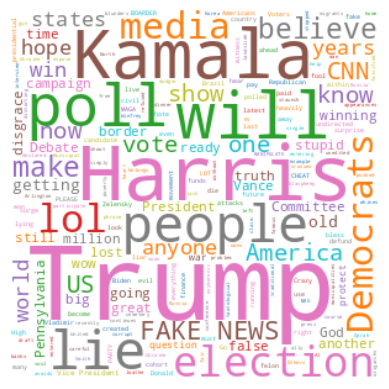

In [ ]:
from wordcloud import WordCloud #https://python-charts.com/es/ranking/wordcloud-matplotlib/

texto = df['comment'].str.cat(sep=' ')

wc = WordCloud(width = 300, height = 300, background_color = "white",
               colormap = "tab10") #https://matplotlib.org/stable/users/explain/colors/colormaps.html
wc.generate(texto)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")




### **Bibliografía:**

* Kuffo, Leonardo (2020): "Análisis de sentimientos". En línea: https://youtu.be/kRVJFhFDuYA?si=xeNj0kS1GLfQveVe
* All, Moez (2024): "Tutorial de análisis NLTK del sentimiento para principiantes" en línea: https://www.datacamp.com/es/tutorial/text-analytics-beginners-nltk
* NLTK(2024): "Documentation. nltk.sentiment.vader module" En línea: https://www.nltk.org/api/nltk.sentiment.vader.html

* CNN-News18(2024): "US Election | U.S Presidential Race: Kamala Harris Widens Lead Over Donald Trump | N18G | News18". En línea: Youtube https://youtu.be/StGxjZDsEGw?si=lB6D1yCZ4D3neTbe